BÁO CÁO BÀI TẬP SỐ 2
DATASET: Dự đoán bệnh tim

***IMPORT THƯ VIỆN ***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


* Các trường trong dataset
- male: giới tính
- age: Tuổi của bệnh nhân
- currentSmoker:có hay không bệnh nhân là người hút thuốc hiện tại
- cigsPerDay:có hay không bệnh nhân là người hút thuốc hiện tại
- BPMeds:có hay không bệnh nhân đang dùng thuốc huyết áp
- prevalentHyp:có hay không bệnh nhân bị tăng huyết áp
- diabetes:có hay không bệnh nhân bị tăng huyết áp
- totChol:mức cholesterol toàn phần 
- sysBP :huyết áp tâm thu
- diaBP: huyết áp tâm trương
- BMI:Chỉ số khối cơ thể
- glucose:mức glucose
-TenYearCHD:10 năm nguy cơ mắc bệnh tim mạch vành CHD

In [14]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


***

In [4]:
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

* Làm sạch dữ liệu bằng phương pháp median

In [5]:

df["education"].fillna(df["education"].median(), inplace = True)
df["cigsPerDay"].fillna(df["cigsPerDay"].median(), inplace = True)
df["BPMeds"].fillna(df["BPMeds"].median(), inplace = True)
df["totChol"].fillna(df["totChol"].median(), inplace = True)
df["BMI"].fillna(df["BMI"].median(), inplace = True)
df["heartRate"].fillna(df["heartRate"].median(), inplace = True)
df["glucose"].fillna(df["glucose"].median(), inplace = True)

In [6]:

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* Tương quan dữ liệu giữa các trường

<AxesSubplot:>

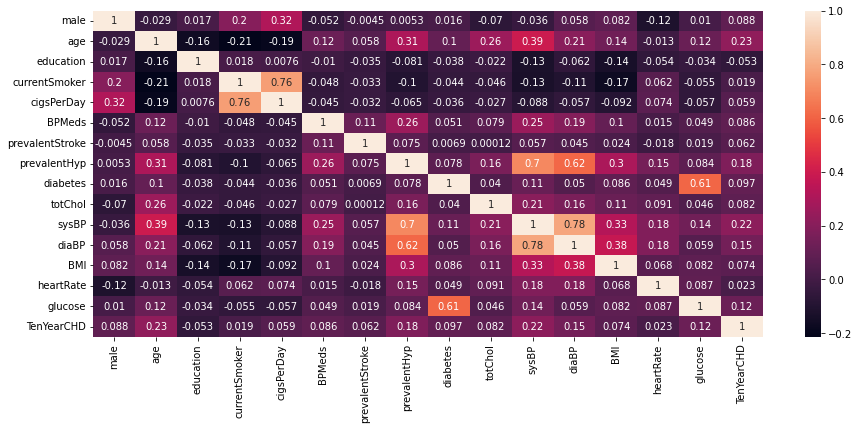

In [7]:


plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot = True)

number of numeric field:  16


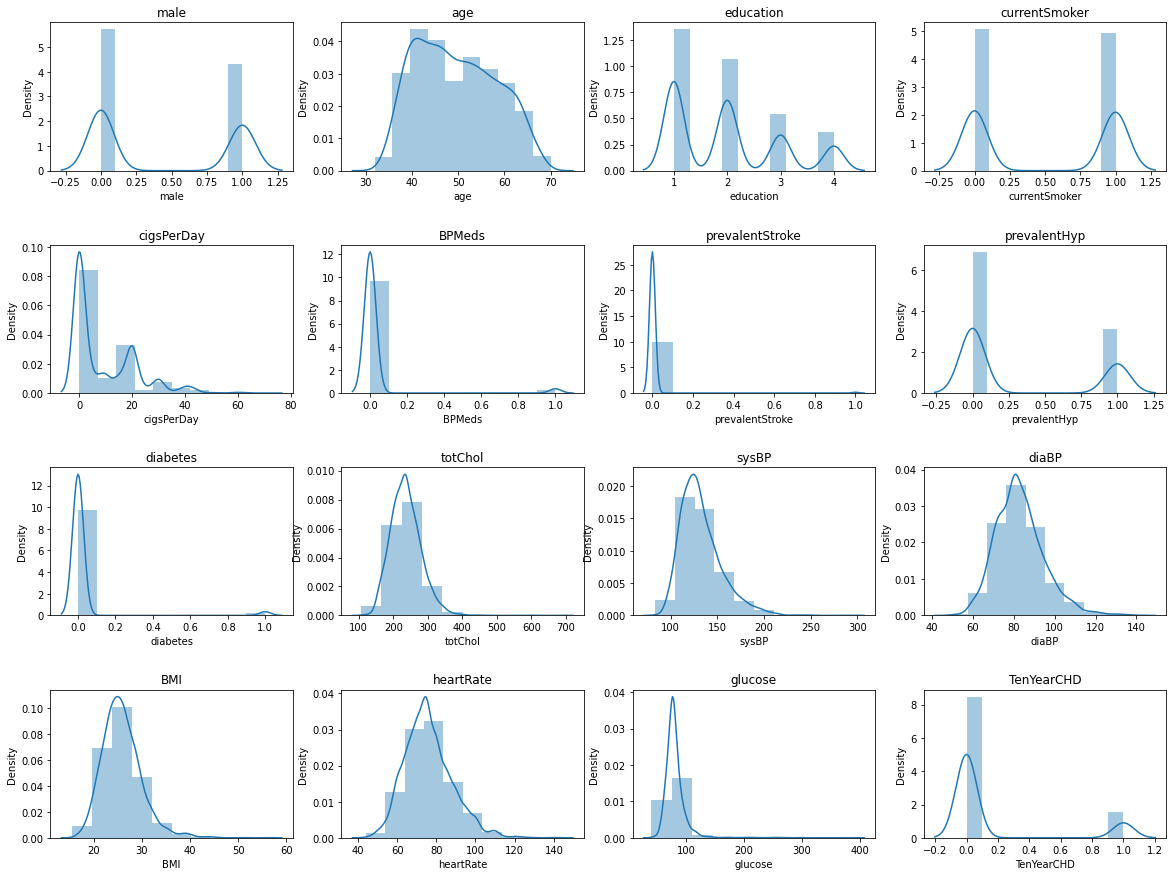

In [8]:
import seaborn as sns
import warnings
datatest=df.copy()
warnings.simplefilter(action='ignore', category=FutureWarning)
numeric_cols =datatest.select_dtypes(include=['float','int']).columns
def _plot_numeric_classes(datatest, col, bins=10, hist=True, kde=True):
    sns.distplot(datatest[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(datatest, numeric_cols, row=4, col=4, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

* Thiết kế pipeline

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
data=df.copy()
X = data.drop(columns=["TenYearCHD","education","heartRate","currentSmoker"])
y = data["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, stratify=y, random_state=42
)
numerical_pipe = Pipeline([
    ("scaler", StandardScaler()),
])

# Cat Cols
categorical_pipe = Pipeline([
    ("encoder", OneHotEncoder()),
])

# Preprocessor
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipe, list(X_train.drop(columns=["male", "BPMeds", 
                                                            "prevalentHyp", 
                                                           "diabetes"]).columns)),
    ("categoric", categorical_pipe, ["male","BPMeds", 
                                      "prevalentHyp", 
                                     "diabetes"])
])

# Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])



def myLog(data):
    X = data.drop(columns=["TenYearCHD","education","heartRate","currentSmoker"])
    y = data["TenYearCHD"]
    array = []
    for i in range(0, 10):
       

        X_train, X_test, y_train, y_test = train_test_split(
                                                     X, y, test_size=.2, stratify=y, random_state=i
                                                                                                        )

        
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        Accuracy_Score = accuracy_score(y_test, y_pred)
        array.append(Accuracy_Score)

    return np.mean(array)
print(f"Accuracy on test: {myLog(df):.4f}")

Accuracy on test: 0.8550


* Tìm kiếm tham số phù hợp cho mô hình(GridSearch)

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator

# Parameter
parameter = {
        'model__penalty': ('l2', 'elasticnet', 'l1'),
        "model__max_iter": [50, 100, 150],
        'model__tol': [1e-4]
}

model = GridSearchCV(pipeline, param_grid=parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
print(
      f"model best params: {model.best_params_}")

pipeline1 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(penalty='l2',max_iter=50,tol=0.0001))
])     
pipeline1.fit(X_train, y_train)
scores = cross_val_score(pipeline1, X_train, y_train, cv=5)
print('Mean train: {:.04f} {:.03f}'.format(np.mean(scores), np.std(scores)))
scores1 = cross_val_score(pipeline1, X_test, y_test, cv=5)
print('Mean test: {:.04f} {:.03f}'.format(np.mean(scores1), np.std(scores1)))


Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\si

model best params: {'model__max_iter': 50, 'model__penalty': 'l2', 'model__tol': 0.0001}
Mean train: 0.8555 0.003
Mean test: 0.8479 0.007


* Đánh giá mô hình trên tập test và tập train

Text(0.5, 1.0, 'TRAIN')

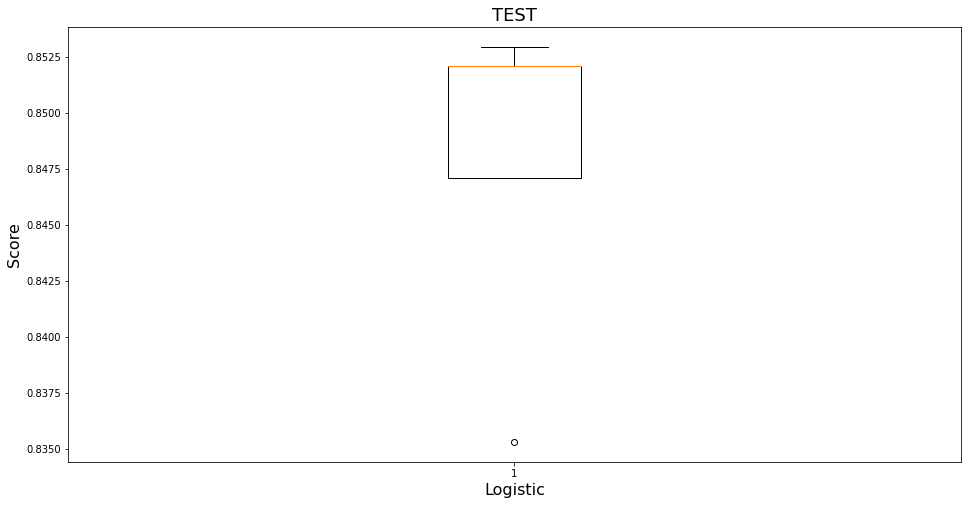

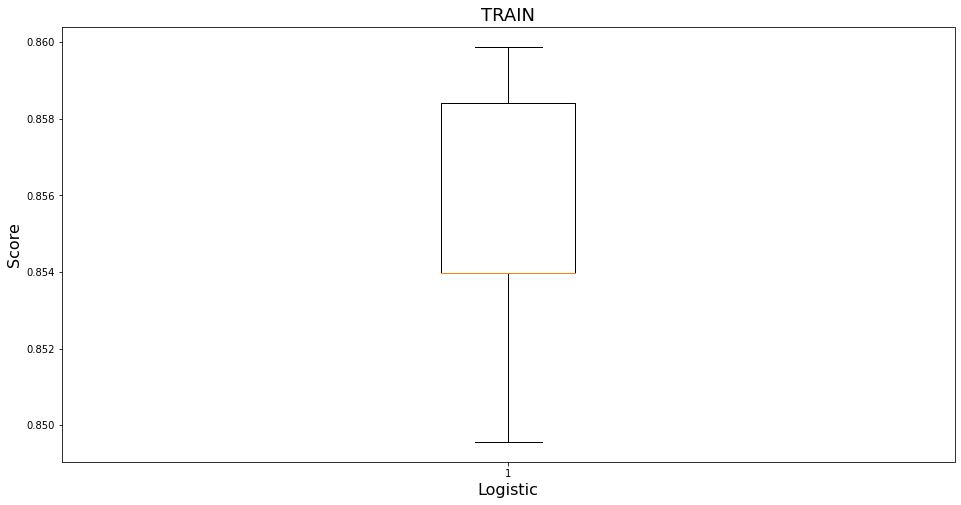

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.boxplot(scores1)
plt.xlabel('Logistic', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title("TEST", fontsize=18)

plt.figure(figsize=(16, 8))
plt.boxplot(scores)
plt.xlabel('Logistic', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title("TRAIN", fontsize=18)